## Import and Install Dependencies

### Installing Dependencies

In [1]:
%pip install tensorflow==2.10

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 204.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 30.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting un

In [2]:
%pip install tensorflow-gpu matplotlib

  Preparing metadata (setup.py) ... - error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 126, in _parse_requirement_details
          marker = _parse_requirement_marker(
        F

In [3]:
%pip install tensorflow-io==0.27.0 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.35.0
    Uninstalling tensorflow-io-gcs-filesystem-0.35.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.35.0
  Attempting uninstall: tensorflow-io
    Found existing installation: tensorflow-io 0.35.0
    Uninstalling tensorflow-io-0.35.0:
      Successfully uninstalled tensorflow-io-0.35.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
tensorflow-decision-forests 1.8.1 requires tensorflow~=2.15.0, but you have tensorflow 2.10.0 which is incompatible.
tensorflow-serving-api 2.14.1 requires protobuf!

### Load Dependencies

In [4]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

2024-07-04 06:07:48.643617: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Check if CUDA and CUDNN are working

In [5]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

Follow this for CUDA and CUDNN
https://docs.nvidia.com/deeplearning/cudnn/latest/installation/windows.html

___________________________________________________________________________________

Specficly follow these (names may be a little different)

Copy the following files from the unzipped package into the NVIDIA cuDNN directory.

Copy bin\cudnn*.dll to C:\Program Files\NVIDIA\CUDNN\v9.x\bin.

Copy include\cudnn*.h to C:\Program Files\NVIDIA\CUDNN\v9.x\include.

Copy lib\x64\cudnn*.lib to C:\Program Files\NVIDIA\CUDNN\v9.x\lib.
___________________________________________________________________________________

Python 3.8
CUDA 11.7
CUDNN 8.5.0

## Build Data loading function

In [7]:
# Path to file
DATA_PATH = '/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing'
CAPUCHIN_FILE = os.path.join(DATA_PATH,'Parsed_Capuchinbird_Clips','XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join(DATA_PATH,'Parsed_Not_Capuchinbird_Clips','afternoon-birds-song-in-forest-0.wav')

In [8]:
NOT_CAPUCHIN_FILE

'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'

### Data Loading function

In [9]:
def load_wav_16k_mono(filename):
    file_contents =tf.io.read_file(filename)
    # Decode wav (Only mono audio no sterio audio)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Remove trailing axis
    wav = tf.squeeze(wav,axis=1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # amplitude of audio signal (44100Hz - 16000Hz)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out = 16000)
    return wav

### Plot wave

In [10]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

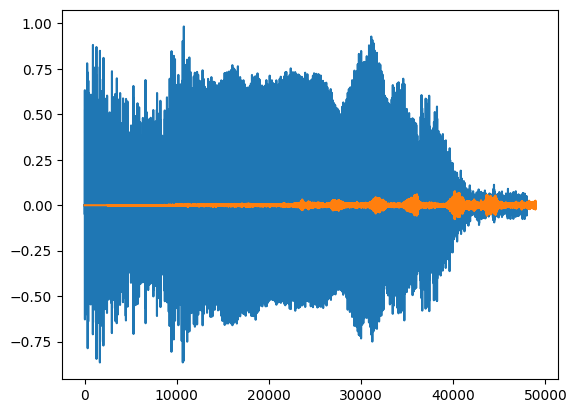

In [11]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

## Create Tensorflow Data

In [12]:
POS = os.path.join(DATA_PATH,'Parsed_Capuchinbird_Clips')
# /kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips
NEG = os.path.join(DATA_PATH,'Parsed_Not_Capuchinbird_Clips')

In [13]:
pos = tf.data.Dataset.list_files(POS + '/*.wav')
neg = tf.data.Dataset.list_files(NEG + '/*.wav')

In [14]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

## Determin Avg Length of a Capuchin Call

In [15]:
lengths = []
for file in os.listdir(os.path.join(DATA_PATH, 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join(DATA_PATH, 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

## Build Preprocessing Function to convert to Spectogram

In [16]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [17]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [18]:
spectrogram, label = preprocess(filepath, label)

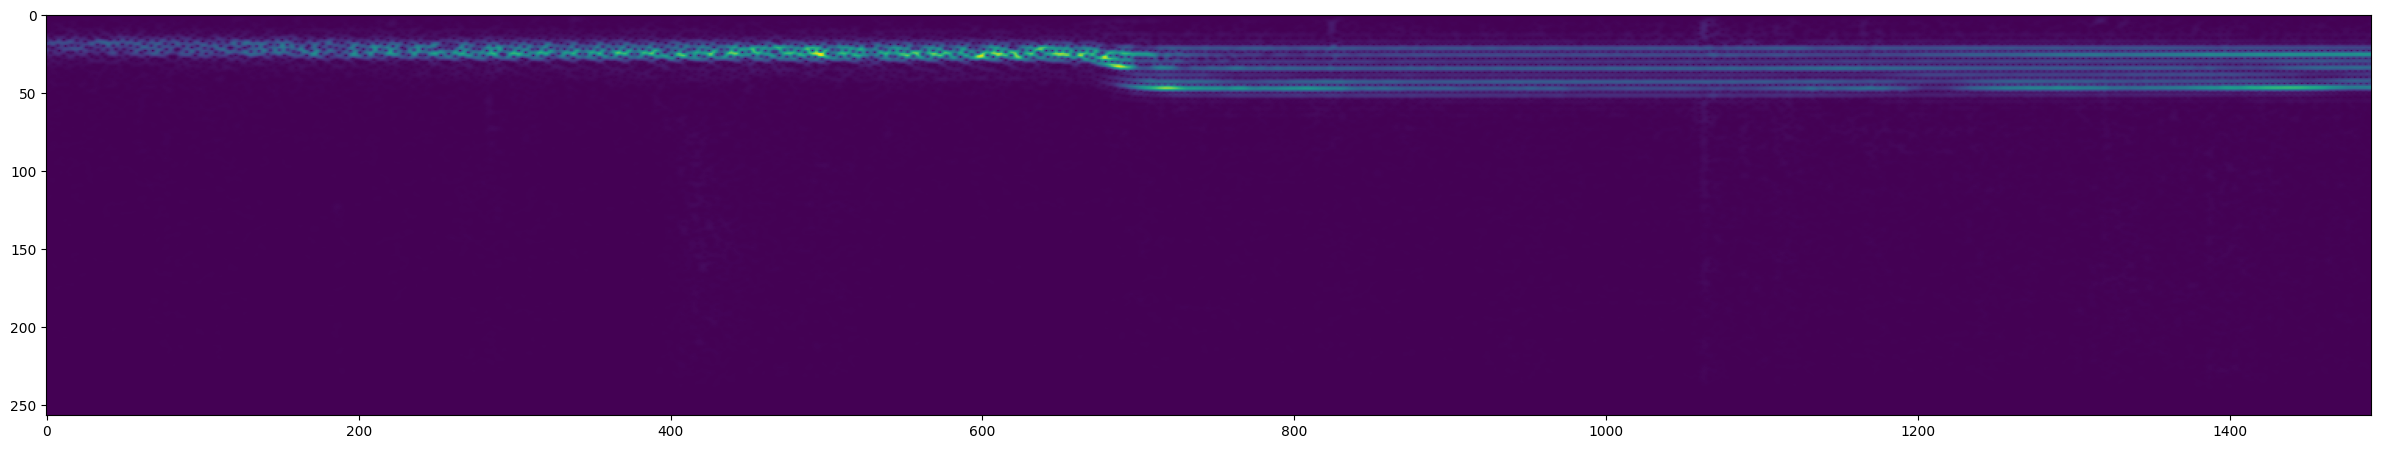

In [19]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

## Create Testing and Training Data

### Tensorflow Pipeline

In [20]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

### Training Testing data


In [21]:
len(data)*0.7

35.699999999999996

In [22]:
train = data.take(36)
test = data.skip(36).take(15)

In [23]:
samples, labels = train.as_numpy_iterator().next()

In [24]:
samples.shape

(16, 1491, 257, 1)

## Build Deep Learning Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [26]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))